In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("../Data/processed_disorder_scores.csv")

In [6]:
df.head(100)

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14,בר מצווה,מה אוהב לעשות,מה מעצבן,משאלות לעתיד,label,file_name
0,8.340149,8.009934,8.303213,8.031889,7.703416,7.713231,8.183612,7.928562,7.250431,7.933859,7.301499,7.838012,7.599473,7.873984,8.723914,8.244795,8.235790,8.134445,0,ש16.docx
1,8.263302,7.894179,8.380863,8.253998,7.704828,7.927092,7.716895,7.975067,7.186601,7.896481,8.394541,7.569062,8.359622,8.226047,7.499118,8.365946,8.763721,8.259058,0,י20.docx
2,8.112892,7.706177,8.041357,7.648164,8.152513,8.817390,7.622620,8.282854,6.775827,7.290435,7.546795,7.403010,7.304299,7.716173,9.152999,7.321930,7.704547,8.153601,0,ש4.docx
3,7.780240,8.361667,8.456865,8.114954,8.085229,7.717344,8.508278,8.053024,7.837383,7.556489,7.759254,7.665548,7.191672,7.750986,8.019887,8.298576,8.340089,8.710752,0,י16.docx
4,7.784339,7.242204,8.309405,8.012666,8.000779,8.245491,7.803475,7.510195,7.116799,7.498297,7.072776,7.034603,7.013885,7.416088,7.271527,7.530611,8.003554,7.693451,0,ש20.docx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7.060434,7.802564,7.933694,7.704214,7.796564,7.949666,7.981521,8.108345,7.282560,7.176981,7.545161,7.647687,7.761024,7.670459,6.757833,7.716500,8.194696,7.572016,1,אש2.docx
76,8.357342,8.426373,7.136952,7.825388,8.010827,7.636810,7.727534,8.099018,7.656229,7.801665,7.625016,7.776384,8.556568,8.304341,7.243745,8.170306,7.243745,7.914167,1,יפ12.docx
77,7.657660,7.620816,7.116363,6.773738,7.098232,8.276363,7.097595,6.893609,7.867169,7.254359,8.835101,7.708054,7.696805,8.240557,8.015328,7.559185,8.068050,7.427837,1,אש3.docx
78,7.222301,7.349883,7.828704,7.381105,7.299941,7.583591,7.890901,7.237042,8.099134,7.795096,8.846972,7.638785,7.377241,7.725877,7.532586,7.841843,8.137445,7.849091,1,יפ5.docx


In [8]:
df_long = pd.melt(df, id_vars=['label', 'file_name'], var_name='question', value_name='score')
print(df_long.shape)
df_long.head()

(1440, 4)


,label,file_name,question,score
0,0,ש16.docx,תמונה 1,8.340149
1,0,י20.docx,תמונה 1,8.263302
2,0,ש4.docx,תמונה 1,8.112892
3,0,י16.docx,תמונה 1,7.780240
4,0,ש20.docx,תמונה 1,7.784339


In [11]:
df_long = df_long.dropna()


0       0
1       0
2       0
3       0
4       0
       ..
1435    1
1436    1
1437    1
1438    1
1439    1
Name: label, Length: 1431, dtype: int64


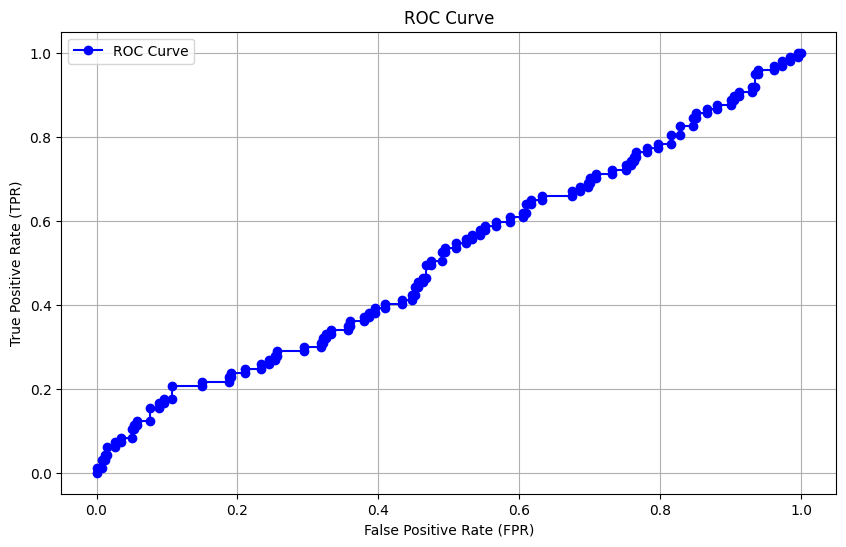

Accuracy: 0.7291
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.5121


In [18]:
# Prepare features and labels
X = df_long.drop(columns=['label', 'file_name' ,'question'])
y = df_long['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = model.predict(X_test)  # Class predictions
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)  # Handle undefined precision
recall = recall_score(y_test, y_pred, zero_division=0)  # Handle undefined recall
f1 = f1_score(y_test, y_pred, zero_division=0)  # Handle undefined F1 score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {auc_score:.4f}')